# *Bankers in the Ivory Tower*

### By Charlie Eaton

### Figure 4.2: University private equity and hedge fund investments and board shares

In [1]:
*ssc install blindschemes

In [2]:
use data/d4_2_4_6_board_cae_nacubo, clear
quietly keep if year>2002 & year<2014

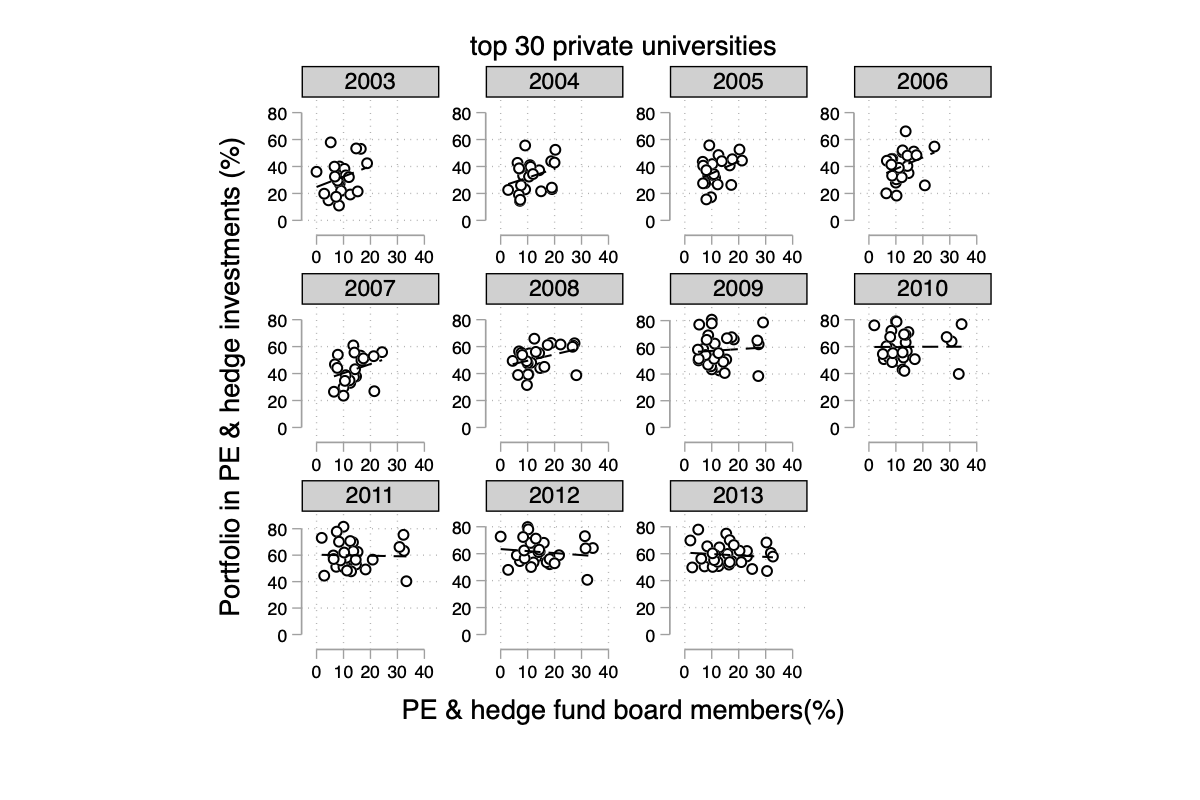




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_2_private_investments_board.pdf saved as PDF format


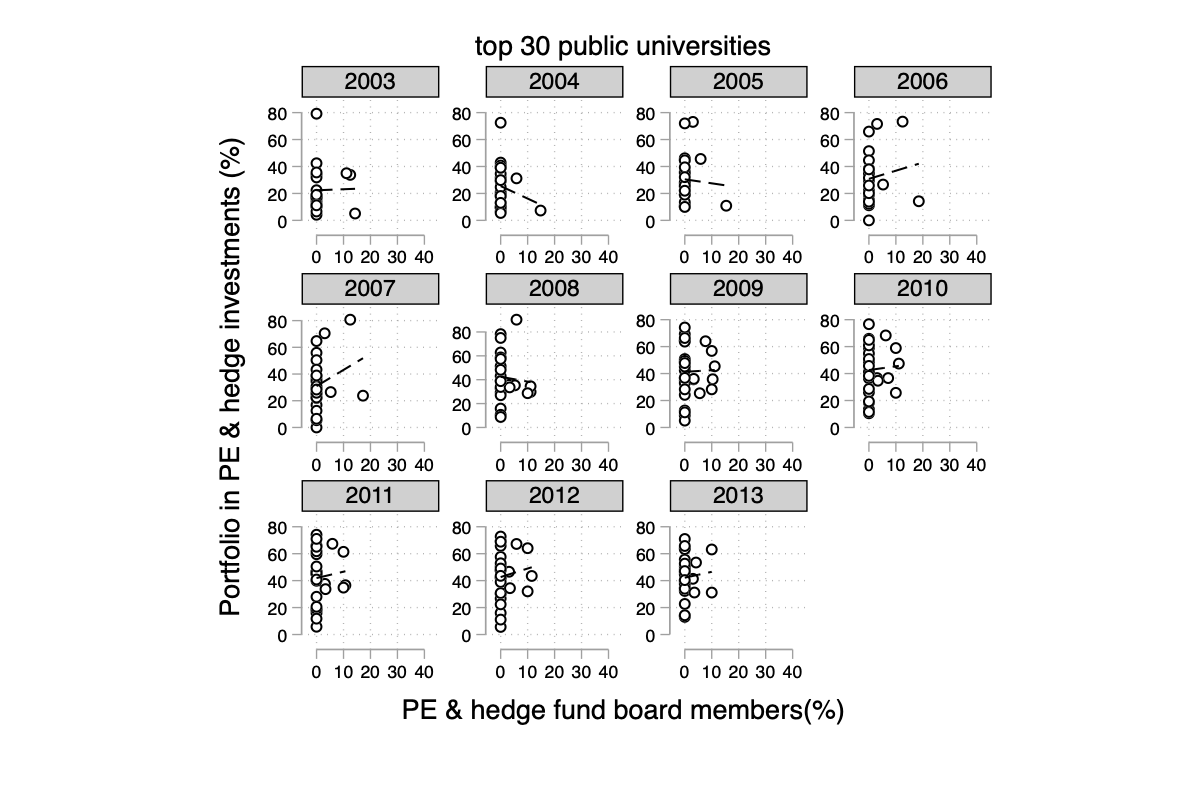




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_2_public_investments_board.pdf saved as PDF format


In [3]:
tw (scatter alt_invest_p pctalt if control==2, msym(O) mc(black) mfc(white)) ///
	(lfit alt_invest_p pctalt if control==2, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero) iscale(.85) row(3) legend(off) title(top 30 private universities) note(" ")) ///
		ytitle("Portfolio in PE & hedge investments (%)") ///
		xtitle(PE & hedge fund board members(%)) ylab(0(20)80) xlabel(0(10)40) ///
		xsize(6) aspect(1) name(private_board_hedge, replace) scheme(plotplain)
graph export figures/f4_2_private_investments_board.pdf, replace

tw (scatter alt_invest_p pctalt if control==1, msym(O) mc(black) mfc(white)) ///
	(lfit alt_invest_p pctalt if control==1, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero)  iscale(.85) row(3) legend(off) title(top 30 public universities) note(" ")) ///
		ytitle("Portfolio in PE & hedge investments (%)") ///
		xtitle(PE & hedge fund board members(%)) ylab(0(20)80) xlabel(0(10)40) ///
		xsize(6) aspect(1) name(public_board_hedge, replace) scheme(plotplain)
graph export figures/f4_2_public_investments_board.pdf, replace

In [4]:
forvalues year=2003/2009 {
    display `year'
regress alt_invest_p pctalt if control==2 & year==`year', ro
}


2003

Linear regression                               Number of obs     =         22
                                                F(1, 20)          =       1.44
                                                Prob > F          =     0.2439
                                                R-squared         =     0.0739
                                                Root MSE          =     12.493

------------------------------------------------------------------------------
             |               Robust
alt_invest_p | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      pctalt |   .7739653   .6445483     1.20   0.244    -.5705388    2.118469
       _cons |   24.78309   6.743686     3.68   0.002       10.716    38.85017
------------------------------------------------------------------------------
2004

Linear regression                               Number of obs     =         24
  

In [5]:
xtset unitid year


Panel variable: unitid (unbalanced)
 Time variable: year, 2003 to 2013
         Delta: 1 unit


In [6]:
reghdfe alt_invest_p pctalt endow_assets_c_log , absorb(unitid) cluster(unitid)

(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =        563
Absorbing 1 HDFE group                            F(   2,     59) =      13.90
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.6745
                                                  Adj R-squared   =     0.6348
                                                  Within R-sq.    =     0.1020
Number of clusters (unitid)  =         60         Root MSE        =    11.2947

                                 (Std. err. adjusted for 60 clusters in unitid)
-------------------------------------------------------------------------------
              |               Robust
 alt_invest_p | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
       pctalt |   .7753945   .2607578     2.9

In [7]:
reghdfe alt_invest_p pctalt endow_assets_c_log if control==2, absorb(unitid) cluster(unitid)

(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =        281
Absorbing 1 HDFE group                            F(   2,     29) =      31.68
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.5734
                                                  Adj R-squared   =     0.5203
                                                  Within R-sq.    =     0.1657
Number of clusters (unitid)  =         30         Root MSE        =    10.6448

                                 (Std. err. adjusted for 30 clusters in unitid)
-------------------------------------------------------------------------------
              |               Robust
 alt_invest_p | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
       pctalt |   .8523486      .3399     2.5

In [8]:
reghdfe alt_invest_p pctalt endow_assets_c_log if control==1, absorb(unitid) cluster(unitid)

(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =        282
Absorbing 1 HDFE group                            F(   2,     29) =       2.69
Statistics robust to heteroskedasticity           Prob > F        =     0.0846
                                                  R-squared       =     0.6699
                                                  Adj R-squared   =     0.6289
                                                  Within R-sq.    =     0.0549
Number of clusters (unitid)  =         30         Root MSE        =    11.8838

                                 (Std. err. adjusted for 30 clusters in unitid)
-------------------------------------------------------------------------------
              |               Robust
 alt_invest_p | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
       pctalt |   .4746344   .5059373     0.9